# Excerise - Logistic Regression and Classification Measures
In this exercise you will explore how hard it is to find the best balance between TPR and FPR. 

Next, you will implement a logistic regression classifier using gradient decent.

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Balancing TPR and FPR and interpretability of a classifier results given inbalance between classes
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e. the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only 1 in 10,000 people. 

1. What is the accuracy of always predicting a patient is healthy? Would that be a good strategy?

2. What are the TPR and FPR of the chosen classifier in this case? Giving that there is a tradeoff between the two --- is it a good point on the ROC curve?

3. Why is it good news that the disease is rare? What are the chances that you actually have the disease?

4. Taking into account the previous answers, would you say the designer of the classifier made a good choice in this case?



#### Answer 1
Answer here...

#### Answer 2
Answer here...

#### Answer 3
Answer here...

#### Answer 4
Answer here...

## Implementing Logistic Regression Model
Recall the loss function of the binary (Univariate) Logistic Regression model

$$ J(\beta)=-\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log(h_\beta(x^{(i)}))+(1-y^{(i)})\log(1-h_\beta(x^{(i)}))\right) $$

and the gradient decent update rule is given by

$$ \beta_j^t := \beta_j^{t-1}-\mu\frac{\partial}{\partial \beta_j}J(\beta)
$$

1. Write the explicit (and rather simple) update rule for a gradient decent solver of the Logistic Regression model.
2. Implement a LogisticRegression class with `fit`, `predict`, and `score` functions, and the constructor of the class should have the following parameters (feel free to add methods and parameters as you see fit):
  * `method`: either `GD` or `SGD`, indiacting whether to use a regular gradient decent, or an [iterative stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Iterative_method) respectively.
  * `learning_rate`: the learning rate to be used
  * `num_iterations`: number of iterations for the gradient decent algorithms (**note** that for stochastic gradient decent, each iteration is interpreted in that aspect as an epoch of going over all the samples, as it is computationaly similar to a single iteration of regular gradient decent)
  * `track_loss`: a boolean stating if to track the loss of the model for each iteration during training; if `True` the model will have a `loss` vector with the loss that was claculated for each of the iterations.
3. Use the provided code to load the Iris dataset as a toy example, on which we will compare the results of the two logistic regression solvers. Run both solvers (GD and SGD) for 1000 iterations, using a learning rate of 0.1, and compare the learning curve by plotting the loss during training. Describe the results, and plot the decision boundary for each of the models. What would you see if you plot the loss after each parameters update (for each sample in every epoch)?
 
 
For simplicity, do not use regularization, and we will not try to find the best learning rate --- however, you are more than welcome to play with those on your own.


#### Answer 1
answer here

#### Answer 2

In [151]:
import numpy as np
class LogisticRegression:
    def __init__(self, method='GD', lr=0.1, num_iterations=500, track_loss=True):
        self.method = method
        self.lr = lr
        self.iters = num_iterations
        self.track_loss = track_loss
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
        
    def cost(self, X, y):
        w = self.sigmoid(X @ self.b)
        m = len(y)
        cost = (1 / m) * (((-y).T @ np.log(w)) - ((1 - y).T @ np.log(1 - w)))
        return cost
    
    def score(self, X, y):
        return self.cost(X, y)
    
    def fit(self, X, y):
        m = len(y)
        loss = []
        self.b = np.zeros((X.shape[1]))

        if self.method == 'GD':
            for i in range(self.iters):
                y_hat = self.predict_prob(X)
                self.b = self.b - (self.lr / m) * (X.T @ (y_hat - y))
                if self.track_loss:
                    loss += [self.cost(X, y)]
                
        if self.method == 'SGD':
            for i in range(self.iters):
                for j,xj in enumerate(X):
                    y_hat = self.predict_prob(xj)
                    self.b = self.b - ( self.lr / m) * (y_hat - y[j]) * xj
                if self.track_loss:
                    loss += [self.cost(X, y)]
                    
        if self.track_loss:
            self.loss = np.array(loss)
                        
    def predict(self, X):
        return np.round(self.predict_prob(X))
    
    def predict_prob(self, X):
        return self.sigmoid(X @ self.b)

        
    
lr = LogisticRegression()
lr.fit(X, y)
sgd_lr = LogisticRegression(method='SGD')
sgd_lr.fit(X,y)
print(lr.score(X,y))
print(sgd_lr.score(X,y))

0.12830780839983882
0.12923347896244278


#### Answer 3

Below is the code for loading the iris dataset and plotting the data with the models decision boundary.

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'label'
  if sys.path[0] == '':
/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  from ipykernel import kernelapp as app


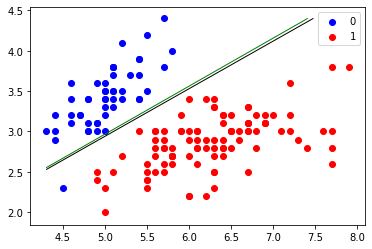

In [149]:
import matplotlib.pyplot as plt
def plot_samples(X, y, gd_model=None, sgd_model=None):
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
  
  x1_min, x1_max = X[:,0].min(), X[:,0].max(),
  x2_min, x2_max = X[:,1].min(), X[:,1].max(),
  xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
  grid = np.c_[xx1.ravel(), xx2.ravel()]
  if gd_model is not None:
    probs = gd_model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black', label='GD');
  if sgd_model is not None:
    probs = sgd_model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green', label='SGD');
  plt.legend()

plot_samples(X, y, gd_model=lr, sgd_model=sgd_lr)

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


In [3]:
from sklearn import datasets

mnist_data = datasets.fetch_openml('mnist_784', data_home = 'datasets/')


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
def print_greyscale(pixels, width=28, height=28):
    def get_single_greyscale(pixel):
        val = 232 + np.round(pixel * 23)
        return '\x1b[48;5;{}m \x1b[0m'.format(int(val))

    for l in range(height):
        line_pixels = pixels[l * width:(l+1) * width]
        print(''.join(get_single_greyscale(p) for p in line_pixels))
d = {}
for j,n in enumerate(mnist_data.target):
    d[n] = mnist_data.data[j]
    
for k,val in d.items():
    print('plotting',k)
    print_greyscale(val)
    
X_train, X_test, y_train, y_test = train_test_split(mnist_data.data, mnist_data.target, test_size=0.14, random_state=0)


plotting 5
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
plotting 0
                            
                            
                            
                            
                            
                     

### Multivariate Logistic Regression
We will now apply the Multivariate Logistic Regression model discriminative model for this problem. We will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 1
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`, and  `multi_class` to `'multinomial'` (leave all other parameters in their default value).

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model.

#### Answer 1
Put you answer here...

In [6]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)

/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:


y_pred = lr.predict(X_test)
conf = confusion_matrix(y_test, y_pred, labels=[str(i) for i in range(10)])
print(conf)
print('acc', np.trace(conf) / np.sum(conf))
# We can see that some digits are easier to classify correctly than others
# e.g. 0 is easier than 5
examples = 3
sample = 0
for i, (gold, pred) in enumerate(zip(y_test,y_pred)):
    if gold != pred:
        sample = i
        examples -= 1
        print('real digit is', gold, 'but classified as', pred)
        print_greyscale(X_test[i])
        if examples == 0:
            break


probs = lr.predict_proba([X_test[i]])
print('probs for missclassified digit above:')
print(list(map(lambda x: "%.5f" % x, probs[0])))

[[ 956    0    1    1    2    9    7    3    5    0]
 [   0 1093    6    2    1    5    1    4    6    3]
 [   4   12  900   15   12    2   16   10   33    4]
 [   2    5   33  874    0   27    3   11   26   12]
 [   1    2    5    0  884    1   11   10    6   25]
 [   7    2    7   31    9  728   14    4   34   10]
 [   8    2    7    0   12   17  919    1    3    0]
 [   2    5   15    3   10    1    1  957    6   40]
 [   3   19   10   19    5   27   10    3  831   13]
 [   4    4    5   11   33    7    1   33    9  848]]
acc 0.9172533414957658
real digit is 7 but classified as 4
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

#### Question 2
Comparing two methods for solving multiclass classification problems: one-vs-rest (OvR), and multinomial.

1. Discuss the results, and explain the plots in [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html).

2. Create another Logistic Regression classifier, setting now `multi_class` to `'ovr'` (instead of `multinomial`). Leave all other parameters the same. Compare the accuracy of this model with the previous one model. 




#### Answer 2
Put you answer here...

In [34]:
# Regarding the probabilities above, we can see that the 3 had pretty low probability to be a 3,
# but instead the classifier wasn't sure whether it's an 8 or a 9,
# two digits that seem to attract a lot of missclassifications
ovr_lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr_lr.fit(X_train, y_train)

/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/avshalommanevich/opt/anaconda3/envs/py4dp/lib/pyt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
conf_ovr = confusion_matrix(y_test, ovr_lr.predict(X_test), labels=[str(i) for i in range(10)])
print(conf_ovr)
print('acc', np.trace(conf_ovr) / np.sum(conf_ovr))
for k,class_row in enumerate(conf_ovr):
    accuracy_ovr = class_row[k] / np.sum(class_row)
    accuracy_mul = conf[k,k] / np.sum(conf[k,:])
    print('acc_ovr', k, accuracy_ovr)
    print('acc_mul', k, accuracy_mul)
    print('for', k, 'ovr wins' if accuracy_ovr > accuracy_mul else 'mul wins')
# We can see that for most digits, multivariate has better accuracy
# We also see that for classes that multivariate did very good on (0 and 6),
# OVR does slightly better. 
# Perhaps because if a class is highly distuinguishable from the rest,
# there's no point in "confusing" the classifier with information on all other classes
ovr_probs = ovr_lr.predict_proba([X_test[i]])
print_greyscale(X_test[i])
print('ovr probs for same missclassified digit above, classified as', ovr_lr.predict([X_test[i]]))
print(list(map(lambda x: "%.6f" % x, ovr_probs[0])))
# Interesting to see that the rogue 3 that multivariate tagged as 9 was tagged by ovr as 8
# Also, OVR gave this 3 an almost 0 probability to be 3
# Instead, OVR gave almost equal proabilities of 1/3 for this 3 to be a 7, 8 or 9

[[ 959    0    2    2    1    5   10    0    5    0]
 [   0 1092    7    2    1    4    3    2    8    2]
 [   9   12  882   22   11    2   15   11   41    3]
 [   4    5   42  859    2   21    3   12   29   16]
 [   2    2    5    1  880    1    9    5    9   31]
 [  10    2    5   34   10  716   19    4   35   11]
 [   4    2    9    0    4   17  922    2    8    1]
 [   4    4   23    1   14    2    1  949    6   36]
 [   5   16   10   24    7   21    6    6  821   24]
 [   5    7   10   14   36    9    1   29    9  835]]
acc 0.9096010611162126
acc_ovr 0 0.9745934959349594
acc_mul 0 0.9715447154471545
for 0 ovr wins
acc_ovr 1 0.9741302408563782
acc_mul 1 0.9750223015165032
for 1 mul wins
acc_ovr 2 0.875
acc_mul 2 0.8928571428571429
for 2 mul wins
acc_ovr 3 0.865055387713998
acc_mul 3 0.8801611278952669
for 3 mul wins
acc_ovr 4 0.9312169312169312
acc_mul 4 0.9354497354497354
for 4 mul wins
acc_ovr 5 0.8463356973995272
acc_mul 5 0.8605200945626478
for 5 mul wins
acc_ovr 6 0.9514963880